Multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Parvathy Shine\Desktop\Assignments\6. MLR\MLR\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
# EDA 1- to understand the data 

print("shape=",df.shape)

print("Columns=",df.columns)

print(df.describe())

print(df.info())

shape= (1436, 11)
Columns= Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.000

In [3]:
# Check for missing values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


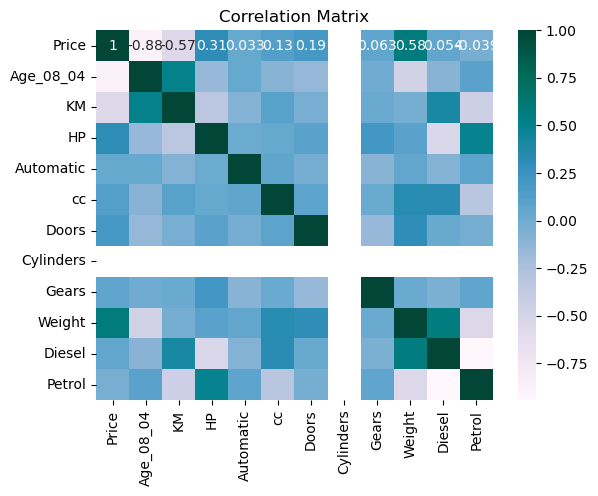

In [16]:
# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
encoded_df = pd.get_dummies(df, drop_first=True)
sns.heatmap(encoded_df.corr(), cmap='PuBuGn',annot=True)
plt.title('Correlation Matrix')
plt.show()

In [5]:
correlation_matrix = df.corr(numeric_only=True)  
print(correlation_matrix)

              Price  Age_08_04        KM        HP  Automatic        cc  \
Price      1.000000  -0.876590 -0.569960  0.314990   0.033081  0.126389   
Age_08_04 -0.876590   1.000000  0.505672 -0.156622   0.031717 -0.098084   
KM        -0.569960   0.505672  1.000000 -0.333538  -0.081854  0.102683   
HP         0.314990  -0.156622 -0.333538  1.000000   0.013144  0.035856   
Automatic  0.033081   0.031717 -0.081854  0.013144   1.000000  0.066740   
cc         0.126389  -0.098084  0.102683  0.035856   0.066740  1.000000   
Doors      0.185326  -0.148359 -0.036197  0.092424  -0.027654  0.079903   
Cylinders       NaN        NaN       NaN       NaN        NaN       NaN   
Gears      0.063104  -0.005364  0.015023  0.209477  -0.098555  0.014629   
Weight     0.581198  -0.470253 -0.028598  0.089614   0.057249  0.335637   

              Doors  Cylinders     Gears    Weight  
Price      0.185326        NaN  0.063104  0.581198  
Age_08_04 -0.148359        NaN -0.005364 -0.470253  
KM        -0.03

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


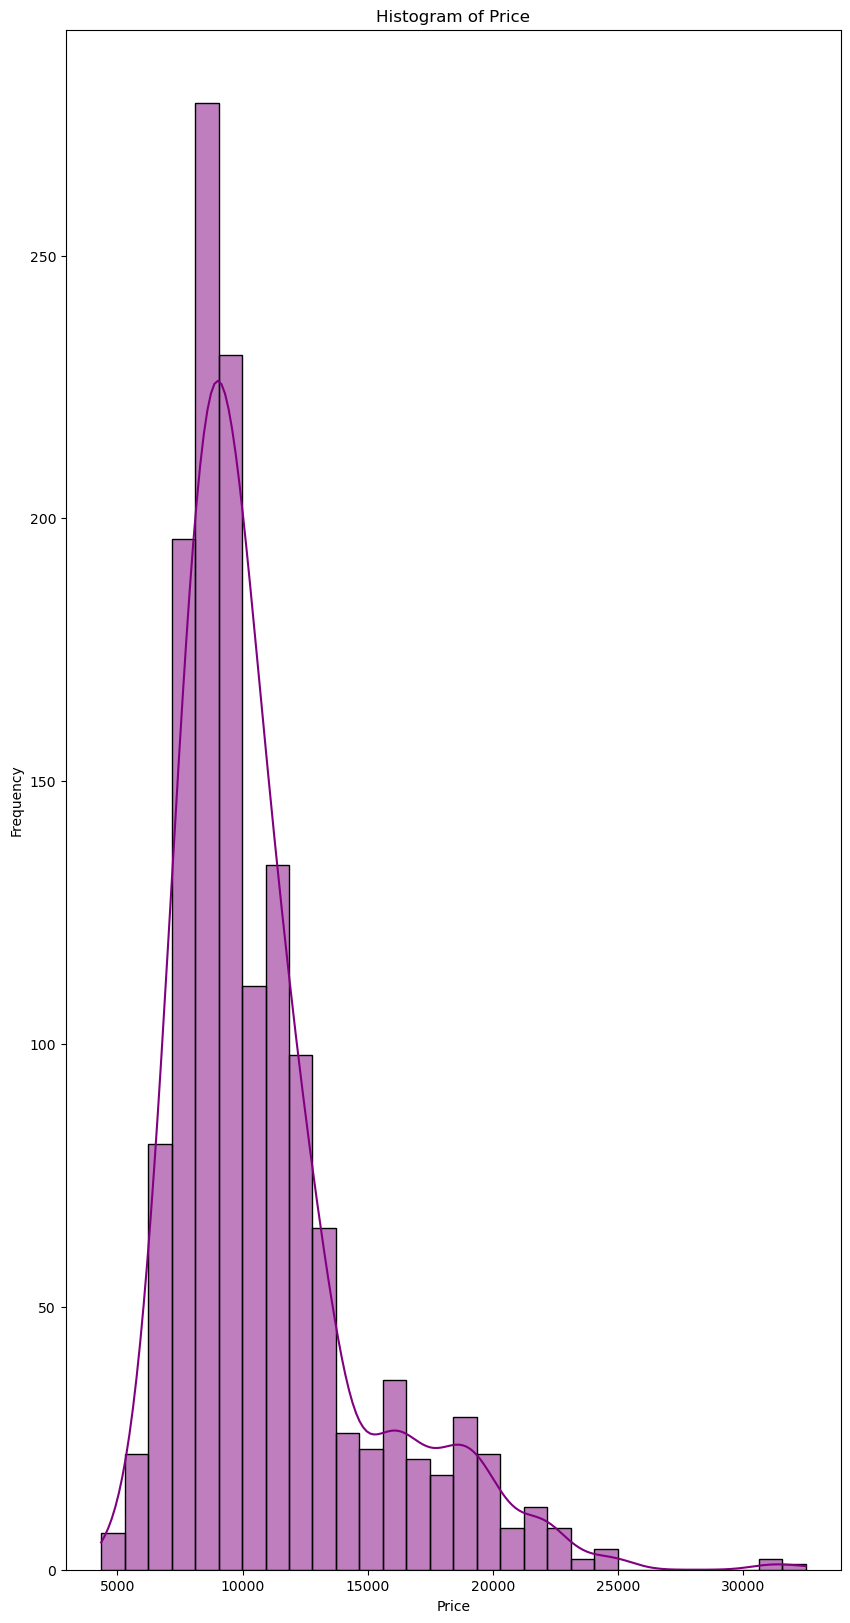

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


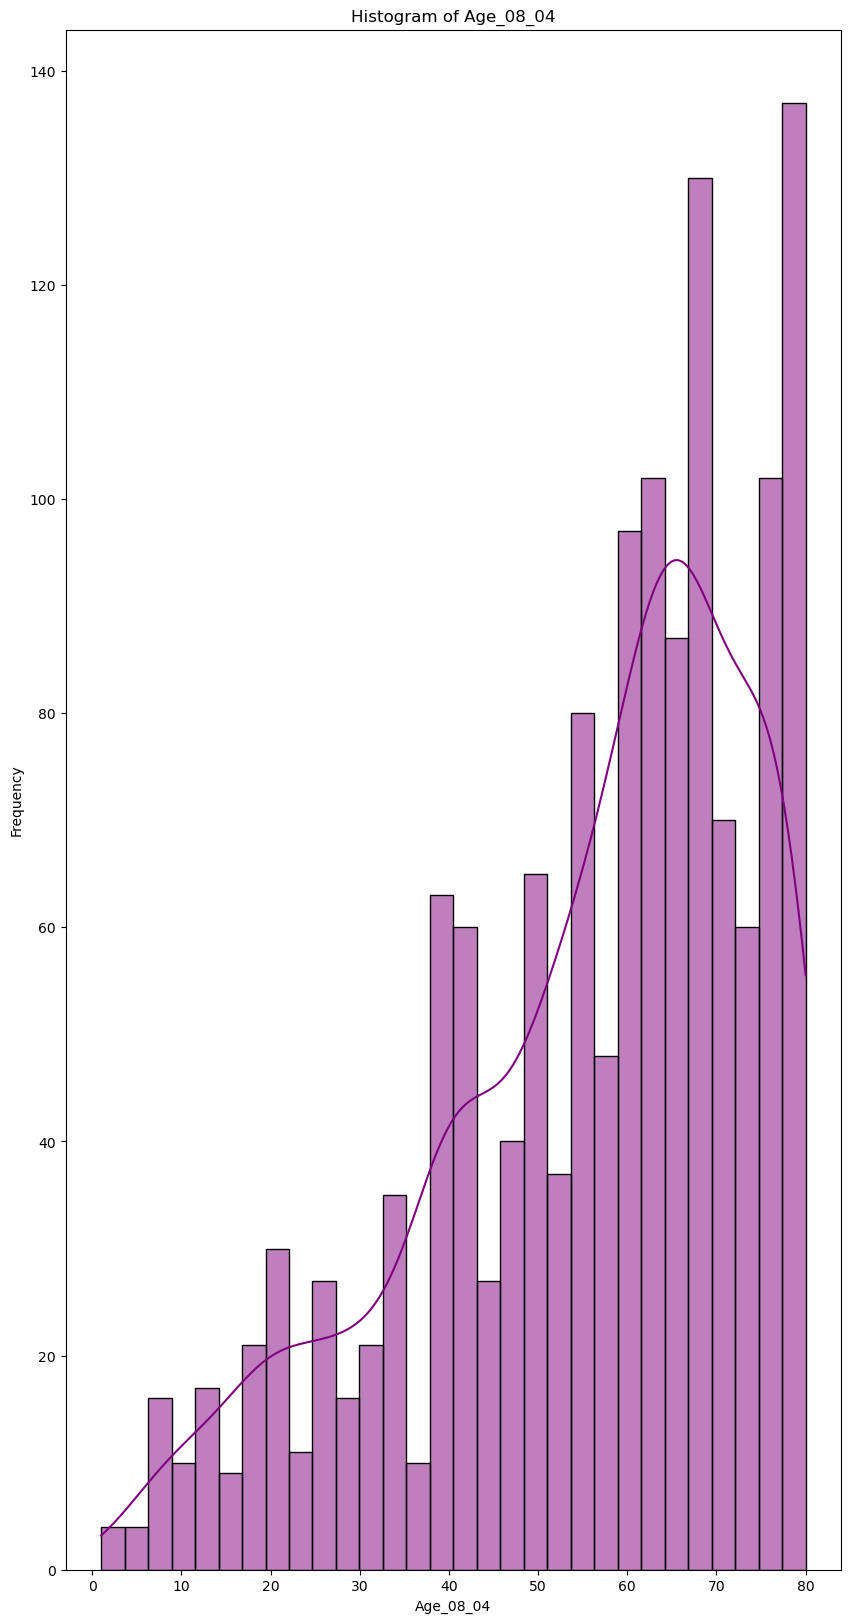

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


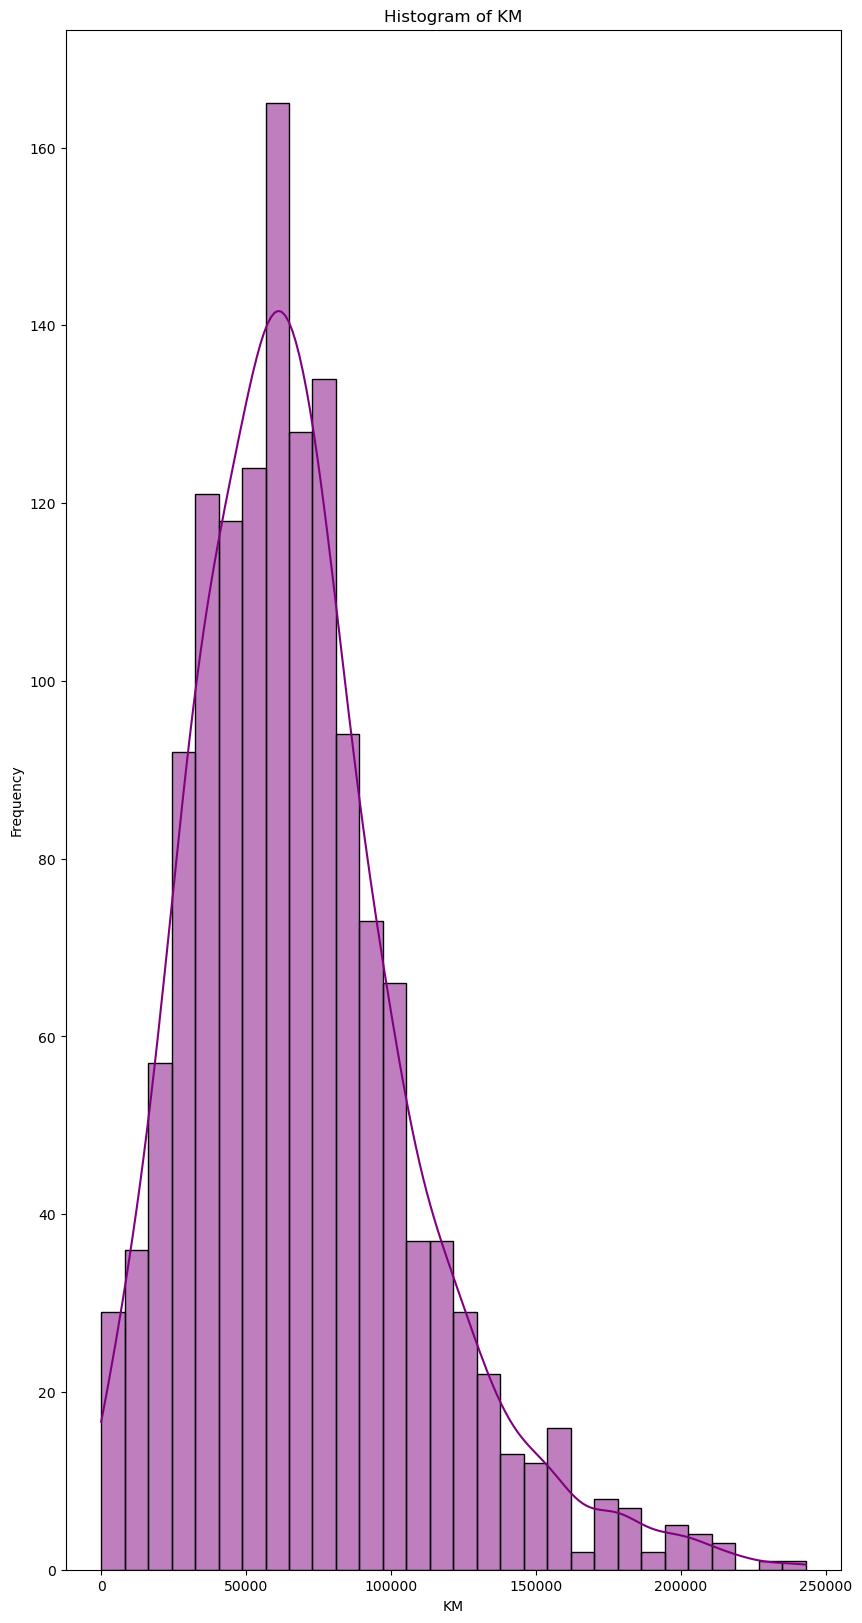

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


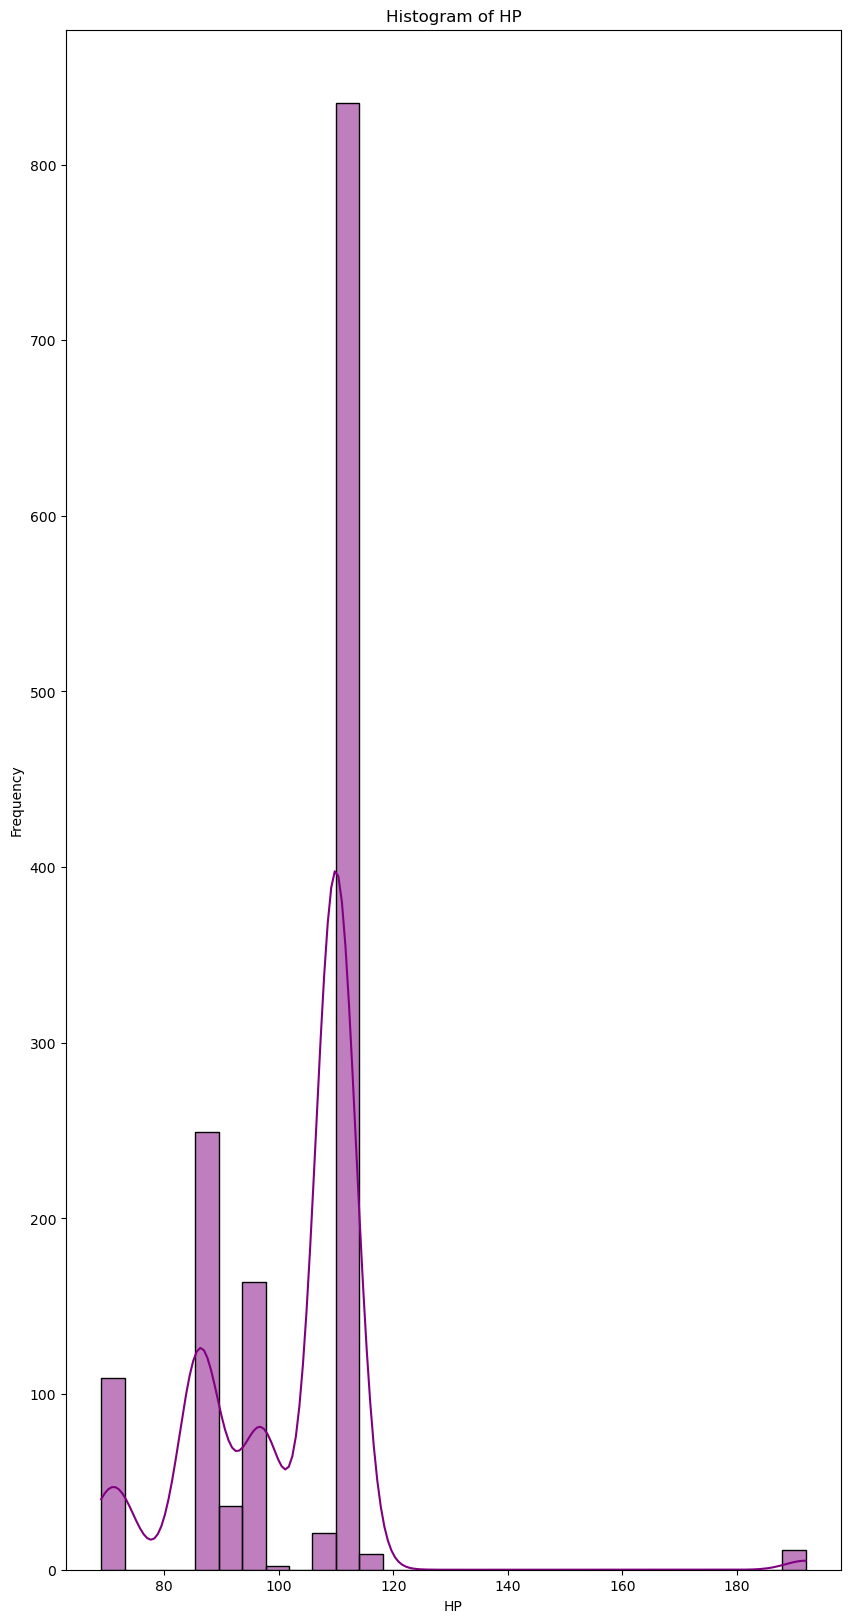

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


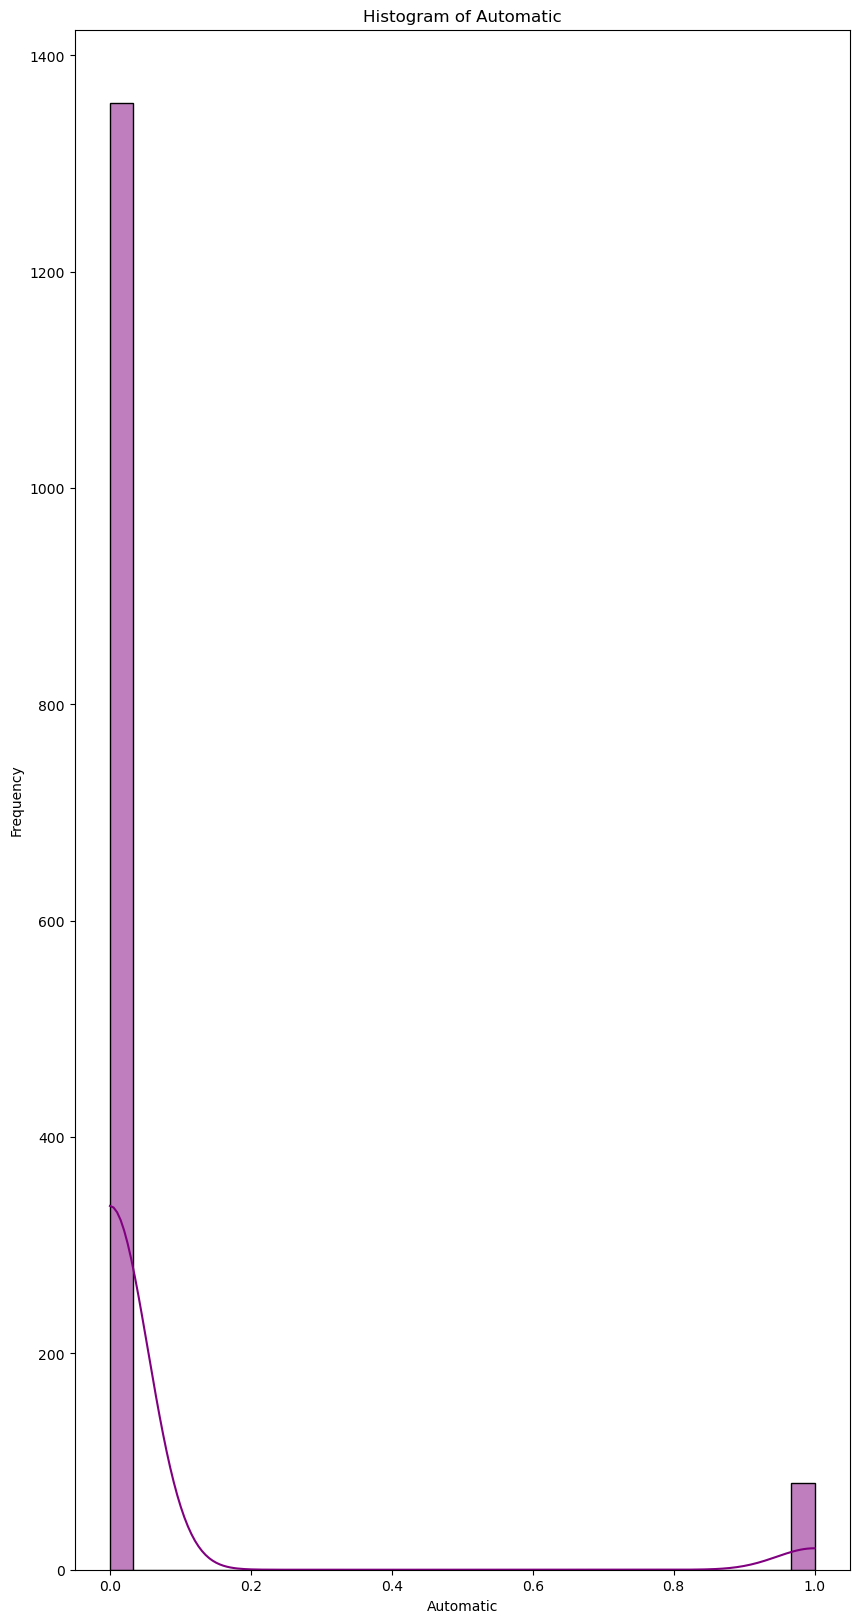

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


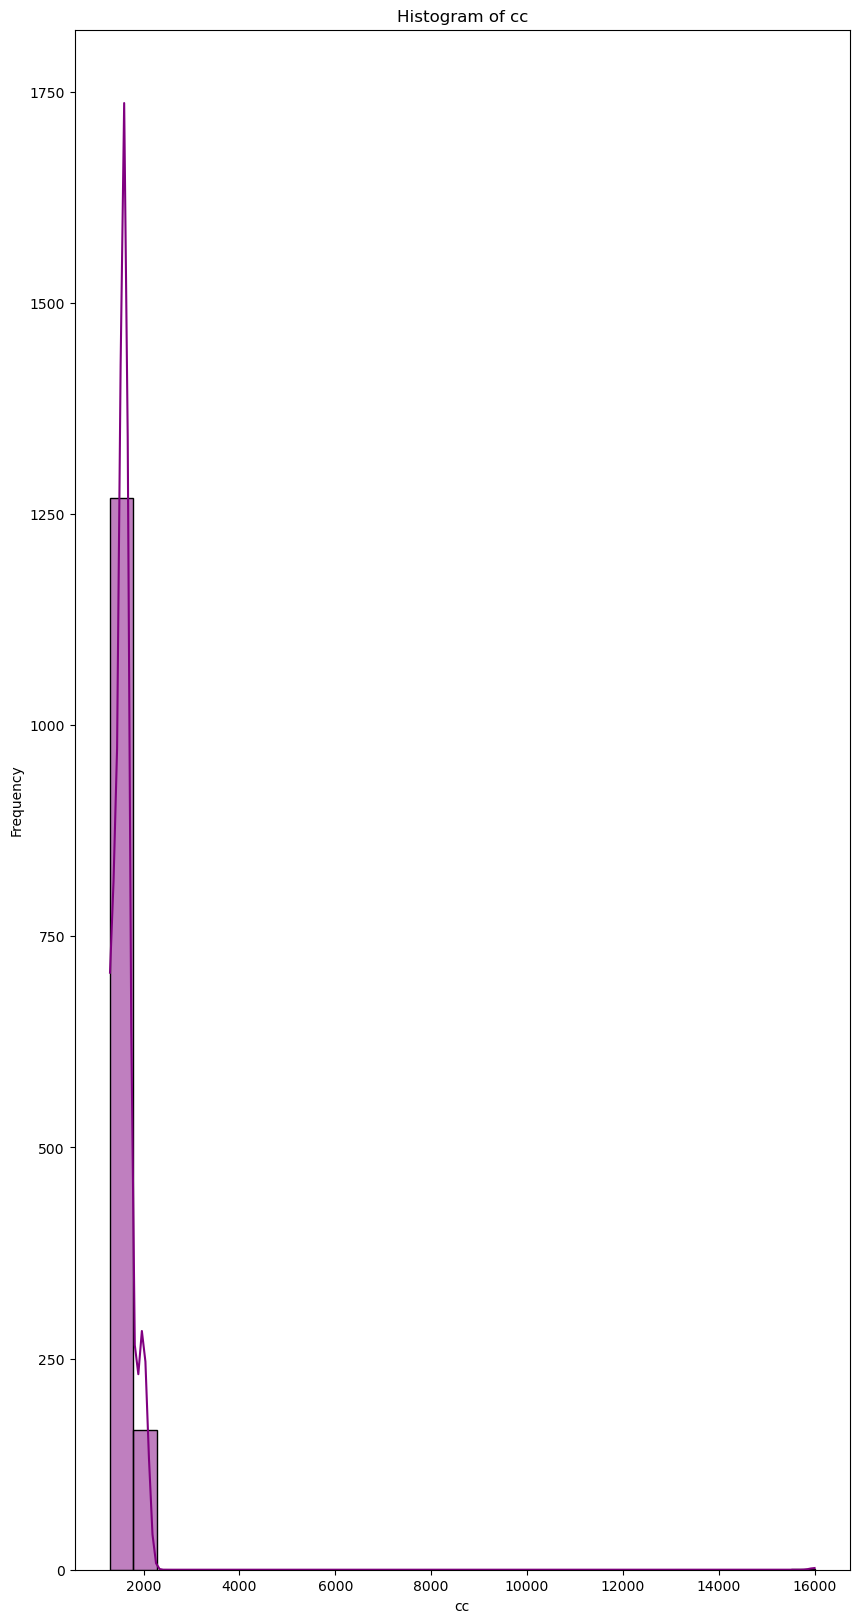

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


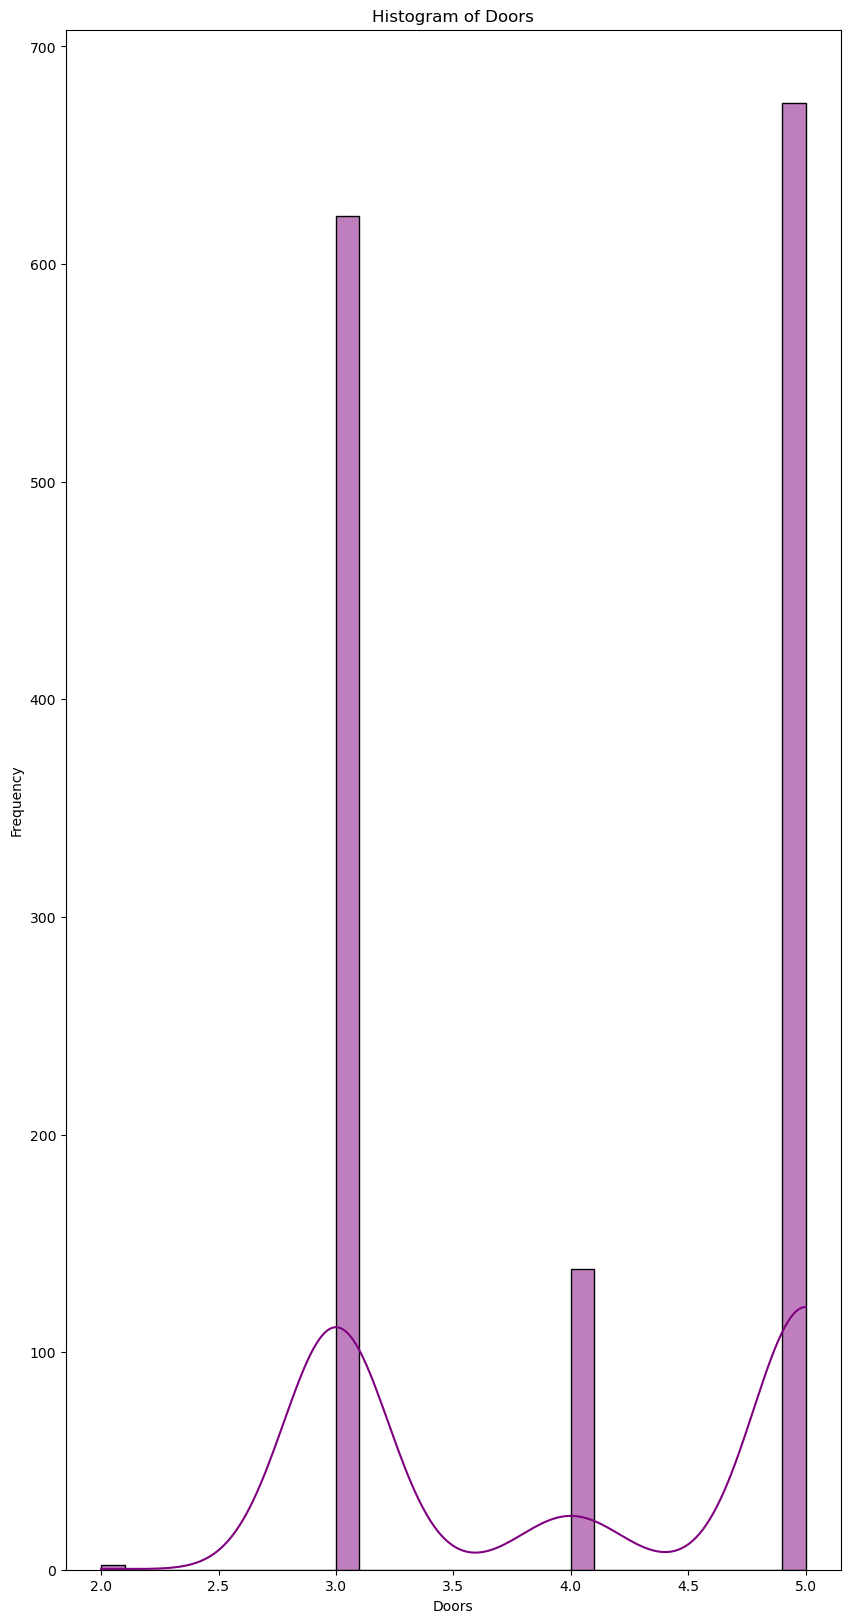

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


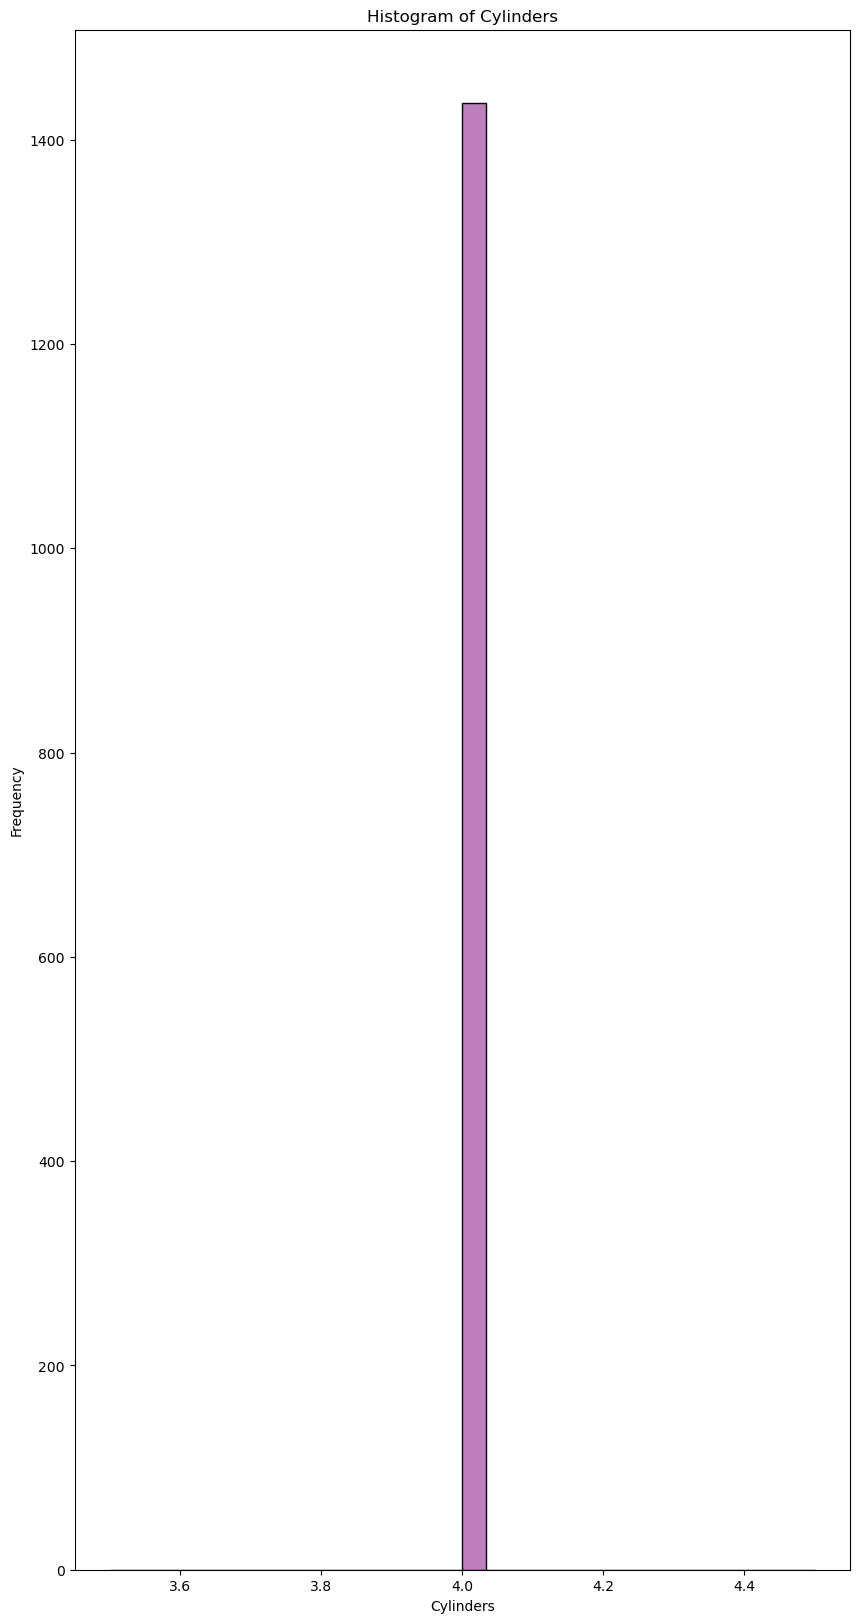

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


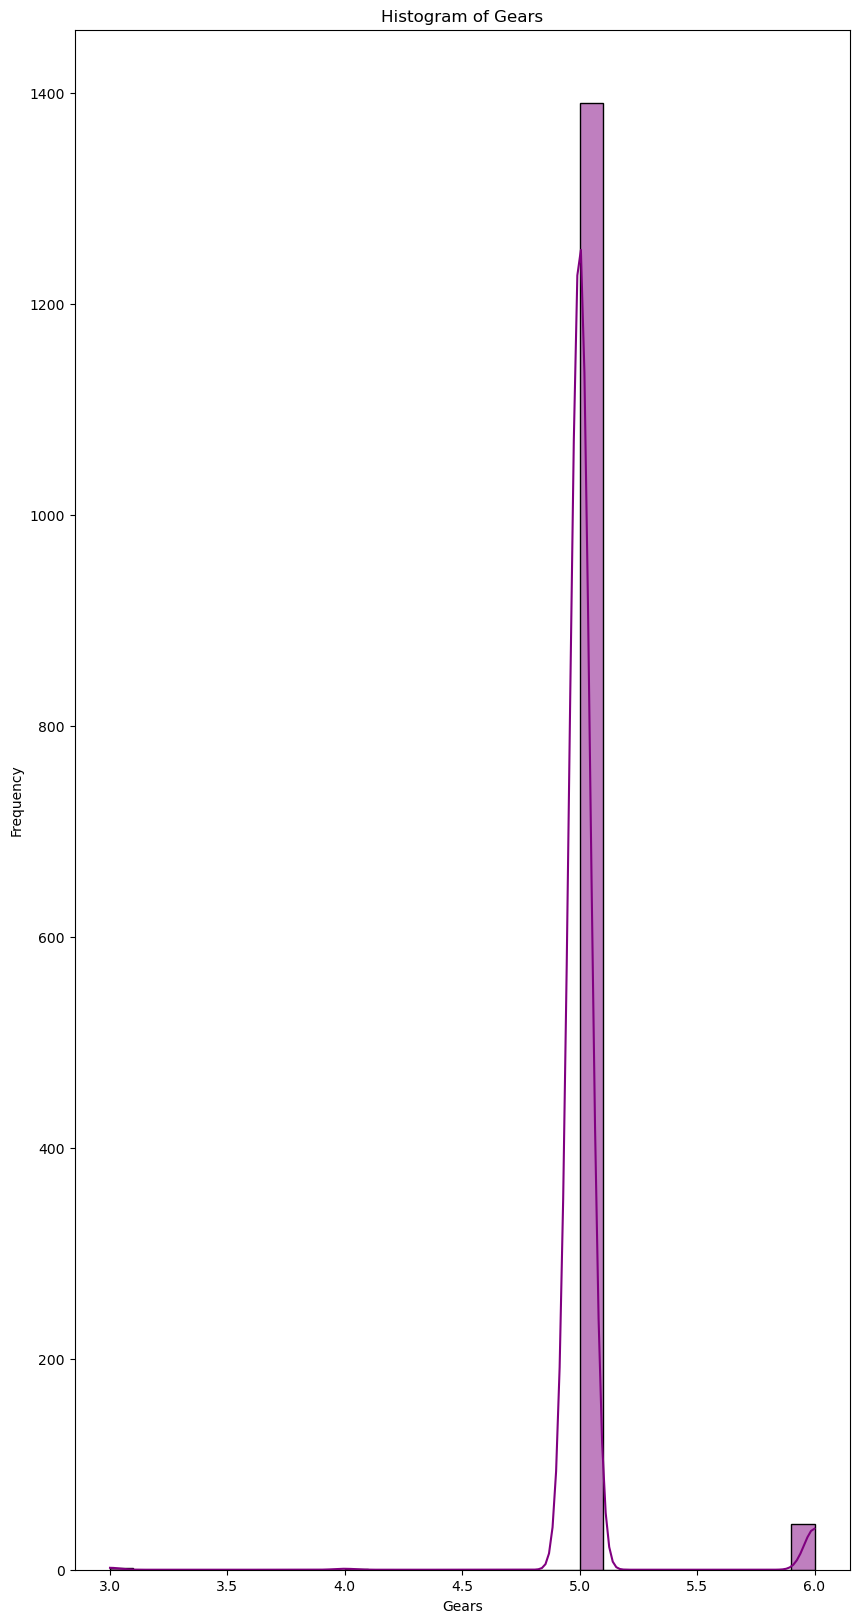

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


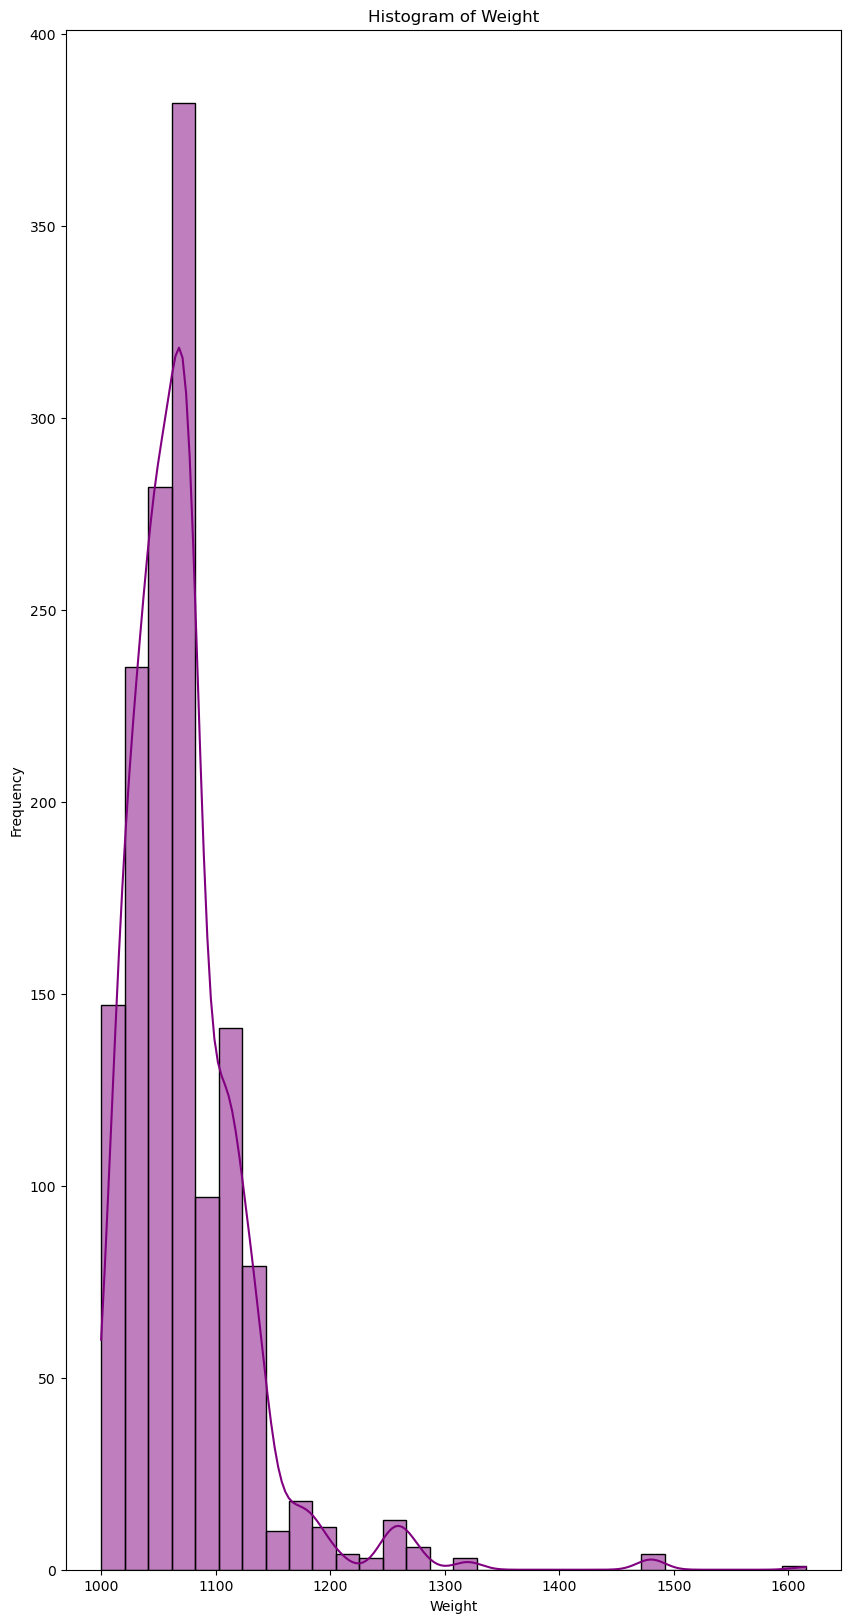

In [6]:
#Data Visualisation of numerical variables:

import matplotlib.pyplot as plt
import seaborn as sns
num_cols= df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(10,20))
    sns.histplot(df[col], bins=30, kde=True, color='purple')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Relevant from this figures are 'Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight'.

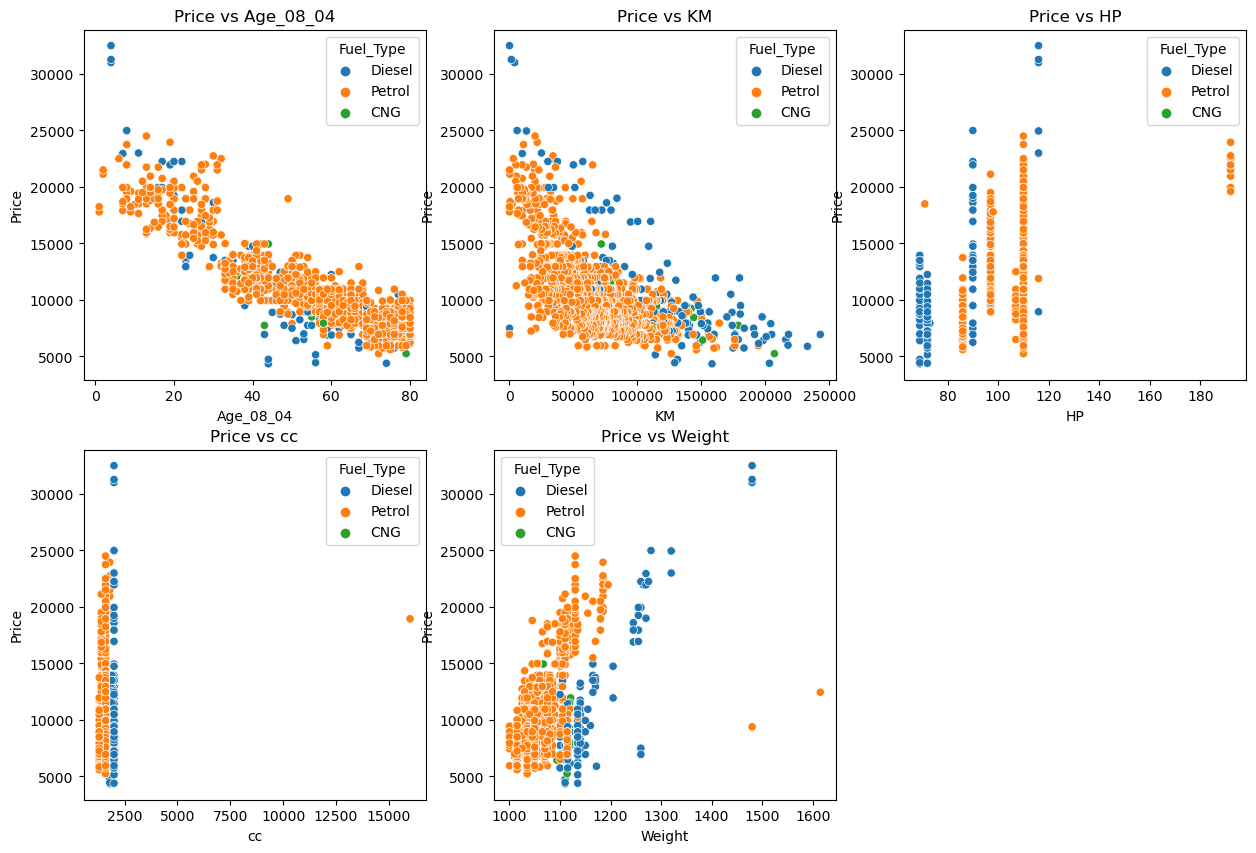

In [7]:
# Scatterplots of features vs. Price

plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age_08_04', 'KM', 'HP', 'cc', 'Weight'], 1): #loops col starting from 1
    plt.subplot(2, 3, i) # Subplot layout with 2 rows and 3 columns and places the current plot in i.
    sns.scatterplot(x=df[col], y=df['Price'], hue=df['Fuel_Type'])
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.show()

In [8]:
# Applying one hot encoding to 'Fuel_Type']
fuel_type = pd.get_dummies(df['Fuel_Type'], drop_first=True)
df = df.drop('Fuel_Type', axis=1)
df = pd.concat([df, fuel_type], axis=1)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Diesel,Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [9]:
# Defining features and target 

X = df.drop(columns=['Price','Cylinders', 'Doors', 'Gears'])  # Features (drop target= Price) and dropping less usefull coloumns. 
y = df['Price'] # Target variable

# Normalize Numerical Features( done for Ridge and Lasso regression)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [10]:
from sklearn.model_selection import train_test_split # Splitting data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # Print shapes

(1148, 8) (288, 8) (1148,) (288,)


3. Building a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
</br>4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Predictions
y_pred = model1.predict(X_test)

# Evaluate model
print("Model 1: Using all features")
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Model 1: Using all features
R-squared: 0.8348487113704006
MSE: 2203578.771449989


In [12]:
# Model 2: Using top 5 Features from the correlation matrix 'Age_08_04', 'Weight', 'KM', 'HP', 'cc'

top_features = ['Age_08_04', 'Weight', 'KM', 'HP', 'cc']
X_top = df[top_features] # Features
y = df['Price'] # Target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test) # Predictions

print("Model 2: Using Top 5 Features")
print("R-squared:", r2_score(y_test, y_pred2))
print("MSE:", mean_squared_error(y_test, y_pred2))

Model 2: Using Top 5 Features
R-squared: 0.8504087218447205
MSE: 1995964.8372853522


In [13]:
# Model 3 : TOP 5 features including fuel_type

X = df[['Age_08_04', 'Weight', 'HP', 'KM', 'cc', 'Diesel', 'Petrol']]
y = df['Price']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred3 = model.predict(X_test)

print("Model 3: Top 5 Features + Fuel Type")
print("R-squared:", r2_score(y_test, y_pred3))
print("MSE:", mean_squared_error(y_test, y_pred3))

Model 3: Top 5 Features + Fuel Type
R-squared: 0.8339266636660871
MSE: 2215881.4592724643


Summary from all 3 models:

1. Model 1 (All Features): Uses all features and provides a good fit but may be overfitting.
2. Model 2 (Top 5 Features): Uses only the most significant features, providing better performance and avoiding overfitting.
3. Model 3 (TOP 5 features including fuel_type) : worst model as fuel type doesn’t significantly impact the price in this case.

   Model 2 is the best 

5.Apply Lasso and Ridge methods on the model.

In [14]:
# Lasso:

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1) # Apply Lasso
lasso.fit(X_train, y_train)

# Evaluate Lasso model
lasso_pred = lasso.predict(X_test)
print("Lasso Regression")
print("R-squared:", r2_score(y_test, lasso_pred))
print("MSE:", mean_squared_error(y_test, lasso_pred))

Lasso Regression
R-squared: 0.8338955394536453
MSE: 2216296.743067003


In [15]:
#Ridge Method

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1) # Apply Ridge
ridge.fit(X_train, y_train)

# Evaluate Ridge model
ridge_pred = ridge.predict(X_test)
print("Ridge Regression")
print("R-squared:", r2_score(y_test, ridge_pred))
print("MSE:", mean_squared_error(y_test, ridge_pred))

Ridge Regression
R-squared: 0.833946202063619
MSE: 2215620.7625598535


Inference: Both models perform nearly identically in terms of R² and MSE, which means regularization didn’t significantly improve or worsen model performance on this dataset.

1.Normalization & Standardization and how is it helpful?
<br>Standardisation:  Transforms data to have a mean = 0 and standard deviation = 1.
<br>Use Case: Useful when features have different units/scales, especially for algorithms like Linear Regression, SVM, PCA.
<br>Normalization: Scales data to a range of 0 to 1.
<br>Use Case: Best when you need all values bounded within a specific range.
    
2.Techniques used to address multicollinearity in multiple linear regression?
<br>Use Regularization Techniques like Ridge Regression or Lasso Regression.
<br>Check VIF (Variance Inflation Factor)